In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme()

In [34]:
df = pd.read_csv("LBJPO.csv")
df.head()

,Rk,G,Date,Series,Tm,Unnamed: 5,Opp,G#,Unnamed: 8,GS,...,BLK,TOV,PF,PTS,GmSc,+/-,Away,Home,Outcome,Point Diff
0,1.0,1.0,2006-04-22,EC1,CLE,0,WAS,1.0,W (+11),1.0,...,0.0,4.0,3.0,32.0,23.3,11.0,0.0,1.0,W,11.0
1,2.0,2.0,2006-04-25,EC1,CLE,0,WAS,2.0,L (-5),1.0,...,3.0,10.0,5.0,26.0,6.7,-2.0,0.0,1.0,L,-5.0
2,3.0,3.0,2006-04-28,EC1,CLE,@,WAS,3.0,W (+1),1.0,...,0.0,4.0,3.0,41.0,27.4,1.0,1.0,0.0,W,1.0
3,4.0,4.0,2006-04-30,EC1,CLE,@,WAS,4.0,L (-10),1.0,...,0.0,7.0,5.0,38.0,23.0,-16.0,1.0,0.0,L,-10.0
4,5.0,5.0,2006-05-03,EC1,CLE,0,WAS,5.0,W (+1),1.0,...,0.0,4.0,5.0,45.0,38.4,-4.0,0.0,1.0,W,1.0


In [64]:
#len(df.loc[(df["Tm"] == "CLE") & (df["Outcome"] == "W") & (df["Date"].str.contains("2006|2007|2008|2009|2010"))])
winpct_cle1 = len(df.loc[(df["Outcome"] == "W") & (df["Date"].str.contains("2006|2007|2008|2009|2010"))]) / len(df.loc[df["Date"].str.contains("2006|2007|2008|2009|2010")])
print(winpct_cle1)

0.5915492957746479


Overall Win Percentage: 0.65%
1st Cleveland Stint Win Percentage: 0.59%
Miami Win Percentage: 0.68%
2nd Cleveland Stint Win Percentage: 0.68%
Lakers Win Percentage: 0.67%


c:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


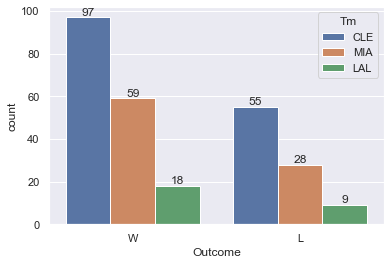

In [65]:
#Win-Loss Record (Split into: 1st CLE stint, MIA, 2nd CLE stint and LAL)
winpct = df["Outcome"].value_counts()["W"] / df.shape[0]
winpct_cle1 = len(df.loc[(df["Outcome"] == "W") & (df["Date"].str.contains("2006|2007|2008|2009|2010"))]) / len(df.loc[df["Date"].str.contains("2006|2007|2008|2009|2010")])
winpct_mia = len(df.loc[(df["Tm"] == "MIA") & (df["Outcome"] == "W")]) / len(df.loc[df["Tm"] == "MIA"])
winpct_cle2 = len(df.loc[(df["Outcome"] == "W") & (df["Date"].str.contains("2015|2016|2017|2018"))]) / len(df.loc[df["Date"].str.contains("2015|2016|2017|2018")])
winpct_lal = len(df.loc[(df["Tm"] == "LAL") & (df["Outcome"] == "W")]) / len(df.loc[df["Tm"] == "LAL"])
print("Overall Win Percentage: {:.2f}%".format(winpct))
print("1st Cleveland Stint Win Percentage: {:.2f}%".format(winpct_cle1))
print("Miami Win Percentage: {:.2f}%".format(winpct_mia))
print("2nd Cleveland Stint Win Percentage: {:.2f}%".format(winpct_cle2))
print("Lakers Win Percentage: {:.2f}%".format(winpct_lal))
ax = sb.countplot("Outcome", data=df, hue="Tm")
for container in ax.containers:
    ax.bar_label(container)

count    266.000000
mean       3.894737
std       14.157211
min      -36.000000
25%       -5.000000
50%        5.000000
75%       12.000000
max       44.000000
Name: Point Diff, dtype: float64


<Figure size 1440x576 with 0 Axes>

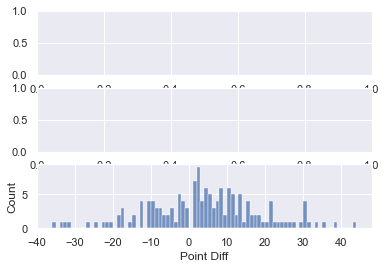

In [72]:
#Point Differential
print(df["Point Diff"].describe())
plt.figure(figsize=(20, 8))
fig,ax = plt.subplots(3,1)
ax[0] = sb.histplot(x = "Point Diff", data=df.loc[df["Tm"] == "CLE"], binwidth=1)